                                        Lab Assignment Module 3
                                                RNN 

1. Consider dataset WEGEM-IND_CPTOTSXN.scv. Try out
 LSTM model (timestamp = 4, train size = 25, test size = 6)
Take train and test sizes of your choices

In [2]:
#pip install pandas numpy scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [5]:
# Load the dataset
data = pd.read_csv(r'D:\1_AJINKYA_PAWAR\3_SOFTWARE JOB\1_CDAC\3_AI_Course\Lab_Assignment_Module_3\RNN_90Min\WGEM-IND_CPTOTNSXN - WGEM-IND_CPTOTNSXN.csv')
data

,Date,Value
0,31-12-1987,19.448655
1,31-12-1988,21.274000
2,31-12-1989,21.967677
3,31-12-1990,23.939126
4,31-12-1991,27.259261
5,31-12-1992,30.471893
6,31-12-1993,32.411083
7,31-12-1994,35.720636
8,31-12-1995,39.372939
9,31-12-1996,42.907602


Epoch 1/100
21/21 [==============================] - 2s 4ms/step - loss: 0.0785
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 11/100
21/21 [==============================] - 0s 4ms/step - loss: 9.0251e-04
Epoch 12/100
21/21 [==============================] - 0s 4ms/step - loss: 7.2843e-04
Epoch 13/100
21/21 [=========

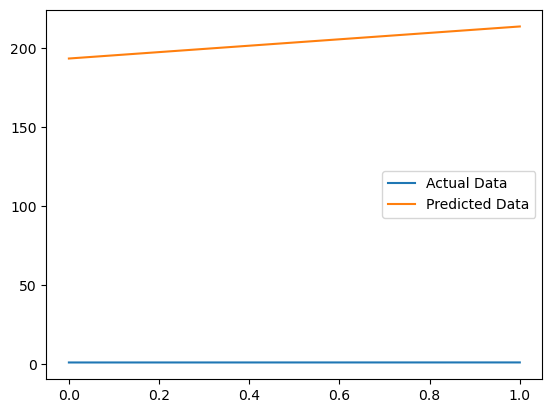

In [6]:


# Assuming your dataset has a column 'value' for the target variable
target_column = 'Value'

# Extract the target variable column
target_data = data[target_column].values

# Normalize the data
scaler = MinMaxScaler()
target_data = scaler.fit_transform(target_data.reshape(-1, 1))

# Define hyperparameters
timestamp = 4
train_size = 25
test_size = 6

# Split the data into train and test sets
train_data = target_data[:train_size]
test_data = target_data[train_size:train_size + test_size]

# Prepare data for training
X_train, y_train = [], []
X_test, y_test = [], []

for i in range(train_size - timestamp):
    X_train.append(train_data[i:i+timestamp])
    y_train.append(train_data[i+timestamp])

for i in range(test_size - timestamp):
    X_test.append(test_data[i:i+timestamp])
    y_test.append(test_data[i+timestamp])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(timestamp, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
predicted_values = model.predict(X_test)

# Inverse transform the predictions to the original scale
predicted_values = scaler.inverse_transform(predicted_values)

# Plot the predictions
plt.plot(test_data[timestamp:], label='Actual Data')
plt.plot(predicted_values, label='Predicted Data')
plt.legend()
plt.show()
